#Задание
1. Скачать датасет с фразами Симпсонов (https://github.com/sujanjoejacob/Text-mining-with-Simpsons-Data)
2. Обучить word2vec на фразах персонажей
3. Визуализировать embeddings по самым частотным словам (top 1000)
4. Найти самые близкие слова для: homer - marge + bart bart - lisa + school marge - homer + home

In [ ]:
import pandas as pd
import numpy as np
import torch 
from gensim.models import Word2Vec
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import multiprocessing

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('simpsons_script_lines.csv', error_bad_lines = False)
df.head()

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158248 entries, 0 to 158247
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  158248 non-null  int64  
 1   episode_id          158248 non-null  int64  
 2   number              158248 non-null  int64  
 3   raw_text            158248 non-null  object 
 4   timestamp_in_ms     158248 non-null  object 
 5   speaking_line       158248 non-null  object 
 6   character_id        140727 non-null  object 
 7   location_id         157841 non-null  float64
 8   raw_character_text  140726 non-null  object 
 9   raw_location_text   157840 non-null  object 
 10  spoken_words        132089 non-null  object 
 11  normalized_text     132064 non-null  object 
 12  word_count          132089 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 15.7+ MB


In [ ]:
df = df.dropna().drop_duplicates().reset_index(drop=True)
df.head(3)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131685 entries, 0 to 131684
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  131685 non-null  int64  
 1   episode_id          131685 non-null  int64  
 2   number              131685 non-null  int64  
 3   raw_text            131685 non-null  object 
 4   timestamp_in_ms     131685 non-null  object 
 5   speaking_line       131685 non-null  object 
 6   character_id        131685 non-null  object 
 7   location_id         131685 non-null  float64
 8   raw_character_text  131685 non-null  object 
 9   raw_location_text   131685 non-null  object 
 10  spoken_words        131685 non-null  object 
 11  normalized_text     131685 non-null  object 
 12  word_count          131685 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 13.1+ MB


In [ ]:
sentences_list = [re.sub(r"[-()\"#/@;:$!<>{}=~|.?,]", '', str(x))
                    for x in df['normalized_text']]
sentence_corpus = [x.split() for x in sentences_list]

In [ ]:
df['splited_words'] = sentence_corpus
df.head(3)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,splited_words
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,"[no, actually, it, was, a, little, of, both, s..."
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0,"[wheres, mr, bergstrom]"
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0,"[i, dont, know, although, id, sure, like, to, ..."


## Word2vec

In [ ]:
sentences = df['splited_words']
cores = multiprocessing.cpu_count()

In [ ]:
model = Word2Vec(min_count=20,
                 window=2,
                 size=300,
                 sample=6e-5,
                 alpha=0.03,
                 min_alpha=0.0007,
                 negative=20,
                 workers = cores - 1)

model.build_vocab(sentences, 
                  progress_per=10000)

model.train(sentences,
            total_examples=model.corpus_count,
            epochs=30,
            report_delay=1)

(12213741, 38951430)

## Top 1000

In [ ]:
top_words = [w[0] for w in sorted ([(w, model.wv.vocab[w].count) for w in model.wv.vocab], key = lambda x: -x[1])[:1000]]
X = model[top_words]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

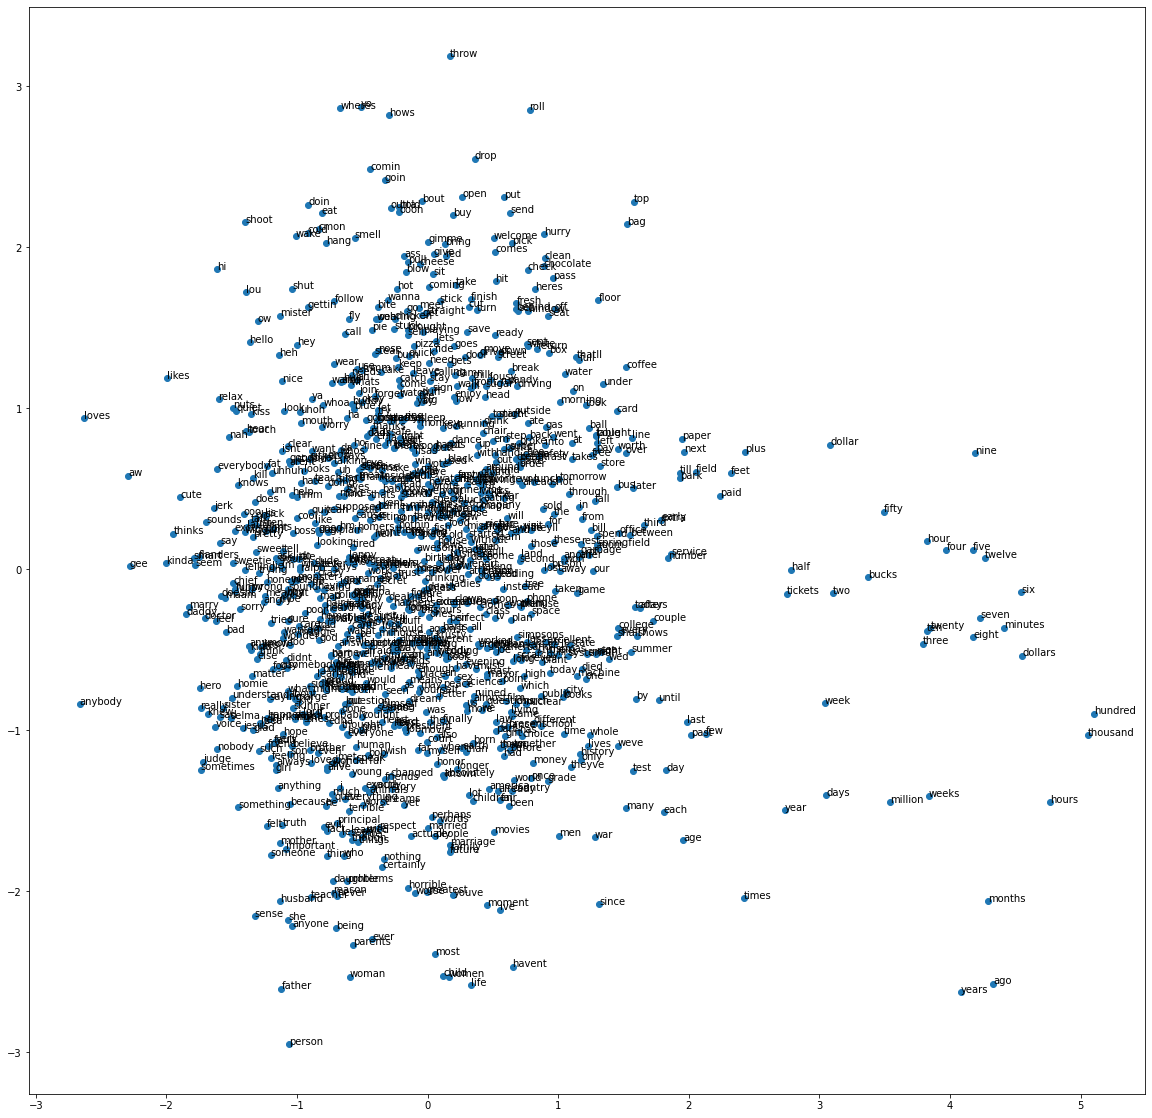

In [ ]:
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(top_words):
  plt.annotate(word, xy=[result[i, 0], result[i, 1]])
plt.gcf().set_size_inches(20,20)

## Nearest words: 
* homer - marge + bart 
* bart - lisa + school 
* marge - homer + home

In [ ]:
similar_1 = model.wv.most_similar(positive=['homer', 'bart'], negative=['marge'], topn = 5)
similar_1

[('lisa', 0.38442370295524597),
 ('mrs', 0.3799278736114502),
 ('j', 0.37263861298561096),
 ('jessica', 0.3693855404853821),
 ('abraham', 0.34321272373199463)]

In [ ]:
similar_2 = model.wv.most_similar(positive=['bart', 'school'], negative=['lisa'], topn = 5)
similar_2

[('roof', 0.3745873272418976),
 ('lawn', 0.3413601517677307),
 ('chalmers', 0.33639633655548096),
 ('schools', 0.33352625370025635),
 ('noon', 0.33099204301834106)]

In [ ]:
similar_3 = model.wv.most_similar(positive=['marge', 'home'], negative = ['homer'], topn = 5)
similar_3

[('anywhere', 0.43332788348197937),
 ('bed', 0.3440386652946472),
 ('near', 0.3420105576515198),
 ('pretend', 0.3320475220680237),
 ('tired', 0.3313847780227661)]